In [1]:
#https://github.com/miguelfzafra/Latest-News-Classifier/blob/master/0.%20Latest%20News%20Classifier/04.%20Model%20Training/09.%20MT%20-%20MultinomialNB.ipynb

import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
pathPickle = "Pickles"
path_df = pathPickle+"/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = pathPickle+"/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = pathPickle+"/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = pathPickle+"/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = pathPickle+"/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [2]:
mnbc = MultinomialNB()
mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [3]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The training accuracy is: 
0.8684599467927875
The test accuracy is: 
0.8678929765886287


In [4]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.79      0.99      0.88       230
           2       0.99      0.85      0.92       171
           3       0.94      0.94      0.94        77
           4       0.00      0.00      0.00         9
           5       0.50      0.36      0.42        14
           6       0.93      0.95      0.94        42
           7       0.67      1.00      0.80         4
           8       0.88      0.75      0.81        20
           9       1.00      0.77      0.87        13
          10       0.00      0.00      0.00         1

    accuracy                           0.87       598
   macro avg       0.61      0.60      0.60       598
weighted avg       0.84      0.87      0.85       598



/home/kelu/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


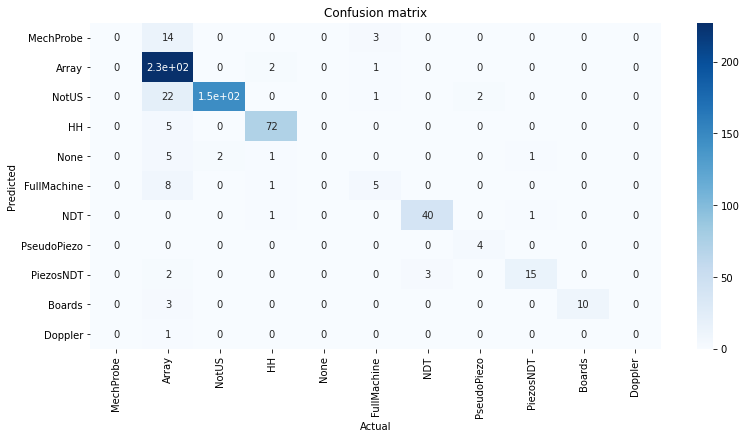

In [5]:
aux_df = df[['group', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['group'].values, 
            yticklabels=aux_df['group'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [6]:
d = {
     'Model': 'Multinomial Naïve Bayes',
     'Training Set Accuracy': accuracy_score(labels_train, mnbc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, mnbc_pred)
}

df_models_mnbc = pd.DataFrame(d, index=[0])

In [7]:
df_models_mnbc

,Model,Training Set Accuracy,Test Set Accuracy
0,Multinomial Naïve Bayes,0.86846,0.867893


In [8]:
with open('Models/best_mnbc.pickle', 'wb') as output:
    pickle.dump(mnbc, output)
    
with open('Models/df_models_mnbc.pickle', 'wb') as output:
    pickle.dump(df_models_mnbc, output)

# Testing the model

In [9]:
pathPickle = "Pickles"

path_X_train = pathPickle+"/X_train.pickle"
with open(path_X_train, 'rb') as data:
    X_train = pickle.load(data)

# X_test
path_X_test = pathPickle+"/X_test.pickle"
with open(path_X_test, 'rb') as data:
    X_test = pickle.load(data)

# y_train
path_y_train = pathPickle+"/y_train.pickle"
with open(path_y_train, 'rb') as data:
    y_train = pickle.load(data)

# y_test
path_y_test = pathPickle+"/y_test.pickle"
with open(path_y_test, 'rb') as data:
    y_test = pickle.load(data)

path_category_names = pathPickle+"/category_names.pickle"
with open(path_category_names, 'rb') as data:
    category_names = pickle.load(data)
    
path_category_codes = pathPickle+"/category_codes.pickle"
with open(path_category_codes, 'rb') as data:
    category_codes = pickle.load(data)

In [10]:
df.keys()

Index(['ItemID', 'value', '_currencyID', 'ViewItemURLForNaturalSearch',
       'Title', 'PrimaryCategoryID', 'Country', 'Description', 'group',
       'StrPrimaryCategoryID', 'Content', 'Title_Clean', 'Category_Code'],
      dtype='object')

In [11]:
predictions = mnbc.predict(features_test)
# Indexes of the test set
index_X_test = X_test.index
# We get them from the original df
df_test = df.loc[index_X_test]
# Add the predictions
df_test['Prediction'] = predictions
# Clean columns
df_test = df_test[['Title','ItemID',"ViewItemURLForNaturalSearch", 'group', 'Category_Code', 'Prediction']]
# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})
# Clean columns again
df_test = df_test[['Title', 'ItemID',"ViewItemURLForNaturalSearch",'group', 'Category_Predicted']]
# Getting differences in results
DIFFERENCES1 = df_test[~(df_test["group"] == df_test["Category_Predicted"])]
DIFFERENCES1

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
702,category181961 YUSHI NDT Angle Beam Probe Tran...,222973001586,https://www.ebay.com/itm/YUSHI-NDT-Angle-Beam-...,None,PseudoPiezo
3355,category185171 B & K Medical Model 1850 Ultras...,264031731255,https://www.ebay.com/itm/B-K-Medical-Model-185...,MechProbe,Array
3231,category46100 ATL Fuel Probe Capacitance Type ...,324065100825,https://www.ebay.com/itm/ATL-Fuel-Probe-Capaci...,NotUS,Array
773,"category181962 BRAND NEW, OLYMPUS MAGNA - MIKE...",283666491163,https://www.ebay.com/itm/BRAND-NEW-OLYMPUS-MAG...,None,Array
3030,category32875 Mira Advance Atl Thermostatic 9...,133349943305,https://www.ebay.com/itm/Mira-Advance-Atl-Ther...,NotUS,Array
...,...,...,...,...,...
1452,category184515 Bard Ultrasound Probe 7.5 MHZ,333528110512,https://www.ebay.com/itm/Bard-Ultrasound-Probe...,MechProbe,Array
1822,category185246 Ultrasound Therapy 1 & 3 Mhz Li...,283801550845,https://www.ebay.com/itm/Ultrasound-Therapy-1-...,PiezosNDT,Array
2962,category63711 Pour Moskvich 21412 1.6 76HP -01...,392666889206,https://www.ebay.com/itm/Pour-Moskvich-21412-1...,NotUS,Array
849,category184542 Bard Site Rite IV | 7.5Mhz 9Mhz...,283683839521,https://www.ebay.com/itm/Bard-Site-Rite-IV-7-5...,MechProbe,FullMachine


In [12]:
predictions = mnbc.predict(features_train)
# Indexes of the test set
index_X_test = X_train.index
# We get them from the original df
df_test = df.loc[index_X_test]
# Add the predictions
df_test['Prediction'] = predictions
# Clean columns
df_test = df_test[['Title','ItemID',"ViewItemURLForNaturalSearch", 'group', 'Category_Code', 'Prediction']]
# Decode
df_test['Category_Predicted'] = df_test['Prediction']
df_test = df_test.replace({'Category_Predicted':category_names})
# Clean columns again
df_test = df_test[['Title', 'ItemID',"ViewItemURLForNaturalSearch",'group', 'Category_Predicted']]
# Getting differences in results
DIFFERENCES2 = df_test[~(df_test["group"] == df_test["Category_Predicted"])]
DIFFERENCES2

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
3922,category184515 BRUEL KJAER 8551 7MHZ ULTRASOUN...,274120409961,https://www.ebay.com/itm/BRUEL-KJAER-8551-7MHZ...,MechProbe,Array
486,category184515 Ultrasound Transducer Probe Cov...,362932203353,https://www.ebay.com/itm/Ultrasound-Transducer...,NotUS,Array
2872,category100006 DIASONICS ULTRASOUND TRANSDUCER...,201132803409,https://www.ebay.com/itm/DIASONICS-ULTRASOUND-...,MechProbe,Array
1864,category57520 Yushi Angle Beam Transducer Sens...,133299611993,https://www.ebay.com/itm/Yushi-Angle-Beam-Tran...,PiezosNDT,PseudoPiezo
490,"category9886 BMW G30 530i, Ultraschallsensor s...",184030839676,https://www.ebay.com/itm/BMW-G30-530i-Ultrasch...,PseudoPiezo,Cables
...,...,...,...,...,...
1929,category184542 Bruel & Kjaer Type 1846 ULTRASO...,143368975820,https://www.ebay.com/itm/Bruel-Kjaer-Type-1846...,FullMachine,HH
115,category40004 Aws Snail Wedge 45 Degree For 5/...,233448331899,https://www.ebay.com/itm/Aws-Snail-Wedge-45-De...,PiezosNDT,PseudoPiezo
1109,category57520 Angle Beam Transducer 5Mhz 14*14...,333465332534,https://www.ebay.com/itm/Angle-Beam-Transducer...,PiezosNDT,PseudoPiezo
3775,"category9886 BMW G30 525d, Ultraschallsensor s...",184036312825,https://www.ebay.com/itm/BMW-G30-525d-Ultrasch...,PseudoPiezo,Cables


In [13]:
diff = pd.concat([DIFFERENCES1,DIFFERENCES2])
diff.to_excel("to_check.xlsx")
diff

,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted
702,category181961 YUSHI NDT Angle Beam Probe Tran...,222973001586,https://www.ebay.com/itm/YUSHI-NDT-Angle-Beam-...,None,PseudoPiezo
3355,category185171 B & K Medical Model 1850 Ultras...,264031731255,https://www.ebay.com/itm/B-K-Medical-Model-185...,MechProbe,Array
3231,category46100 ATL Fuel Probe Capacitance Type ...,324065100825,https://www.ebay.com/itm/ATL-Fuel-Probe-Capaci...,NotUS,Array
773,"category181962 BRAND NEW, OLYMPUS MAGNA - MIKE...",283666491163,https://www.ebay.com/itm/BRAND-NEW-OLYMPUS-MAG...,None,Array
3030,category32875 Mira Advance Atl Thermostatic 9...,133349943305,https://www.ebay.com/itm/Mira-Advance-Atl-Ther...,NotUS,Array
...,...,...,...,...,...
1929,category184542 Bruel & Kjaer Type 1846 ULTRASO...,143368975820,https://www.ebay.com/itm/Bruel-Kjaer-Type-1846...,FullMachine,HH
115,category40004 Aws Snail Wedge 45 Degree For 5/...,233448331899,https://www.ebay.com/itm/Aws-Snail-Wedge-45-De...,PiezosNDT,PseudoPiezo
1109,category57520 Angle Beam Transducer 5Mhz 14*14...,333465332534,https://www.ebay.com/itm/Angle-Beam-Transducer...,PiezosNDT,PseudoPiezo
3775,"category9886 BMW G30 525d, Ultraschallsensor s...",184036312825,https://www.ebay.com/itm/BMW-G30-525d-Ultrasch...,PseudoPiezo,Cables


# After doing manual corrections

In [14]:
new = pd.read_excel("to_check_ok.xlsx").dropna()
new

,Unnamed: 0,Title,ItemID,ViewItemURLForNaturalSearch,group,Category_Predicted,MyCat
0,1857,GE LOGIQ 200 Pro Series Ultraschallgerät mit ...,114125257139,https://www.ebay.com/itm/GE-LOGIQ-200-Pro-Seri...,Boards,Array,Boards
1,1569,HP 77110-60430 Probe Connector Board for Phili...,223686050316,https://www.ebay.com/itm/HP-77110-60430-Probe-...,Boards,Array,Boards
2,3034,KRETZTECHNIK / 195073 45204 64 CNM 3A P3,382897423305,https://www.ebay.com/itm/KRETZTECHNIK-195073-4...,Boards,Array,Boards
3,806,KRETZTECHNIK / 195073 45204 64 CNM 3A P3,261734099990,https://www.ebay.com/itm/KRETZTECHNIK-195073-4...,Boards,Array,Boards
4,853,GE Voluson Ultrasound Motherboard Kretz 194329...,274286643425,https://www.ebay.com/itm/GE-Voluson-Ultrasound...,Boards,Array,Boards
...,...,...,...,...,...,...,...
833,731,"BMW G30 530i, Ultraschallsensor schwarz, 66209...",184030839334,https://www.ebay.com/itm/BMW-G30-530i-Ultrasch...,NotUS,PseudoPiezo,NotUS
834,944,"BMW G30 520d, Ultraschallsensor Kaschmirsilber...",184037699484,https://www.ebay.com/itm/BMW-G30-520d-Ultrasch...,NotUS,PseudoPiezo,NotUS
835,1680,"BMW G30 520dX, Ultraschallsensor Mineralweiss,...",184036316841,https://www.ebay.com/itm/BMW-G30-520dX-Ultrasc...,NotUS,PseudoPiezo,NotUS
836,2809,"BMW G30 525d, Ultraschallsensor Mineralweiss, ...",184036324131,https://www.ebay.com/itm/BMW-G30-525d-Ultrasch...,NotUS,PseudoPiezo,NotUS


In [15]:
import os
pathimg = "/home/kelu/ultrasound/ebaystrove/images/"

In [16]:
if 0:
    for row in range(len(new)):
        if new.iloc[row]["group"] == "None":
            pathfrom = pathimg + str(new.iloc[row]["ItemID"])
        else:
            pathfrom = pathimg + new.iloc[row]["group"] + "/" + str(new.iloc[row]["ItemID"])
        pathto = pathimg + new.iloc[row]["MyCat"] + "/"

        try:
            os.rename(pathfrom + ".jpg", pathto+str(new.iloc[row]["ItemID"])+".jpg")
        except:
            print("Error on "+str(new.iloc[row]["ItemID"])+".jpg")

Error on 323786964700.jpg
Error on 254526775614.jpg
Error on 254526770596.jpg
Error on 254526770600.jpg
Error on 233510402868.jpg
Error on 254526770590.jpg
Error on 254526770589.jpg
Error on 254526775611.jpg
Error on 254526775624.jpg
Error on 254526775609.jpg
Error on 254526770597.jpg
Error on 112770586532.jpg
Error on 254526770583.jpg
Error on 254526775612.jpg
Error on 254526770605.jpg
Error on 382297800172.jpg
Error on 143394311029.jpg
Error on 223577695096.jpg
Error on 164060421512.jpg
Error on 223935245778.jpg
Error on 223841507644.jpg
Error on 223935244958.jpg
Error on 324091755896.jpg
Error on 324015679876.jpg
Error on 383449498160.jpg
Error on 193098649906.jpg
Error on 223935244669.jpg
Error on 223935244916.jpg
Error on 324017589749.jpg
Error on 223935242992.jpg
Error on 223935245849.jpg
Error on 223935244630.jpg
Error on 324091756293.jpg
Error on 183951215209.jpg
Error on 223934492998.jpg
Error on 264652240228.jpg
Error on 233512520224.jpg
Error on 174103174085.jpg
Error on 324

Error on 223925335746.jpg
Error on 223925324421.jpg
Error on 223925324382.jpg
Error on 223925324408.jpg
Error on 153338898294.jpg
Error on 352980715742.jpg
Error on 133173582649.jpg
Error on 133342285122.jpg
Error on 254526770595.jpg
Error on 254526775626.jpg
Error on 254526791094.jpg
Error on 254526775605.jpg
Error on 184163206301.jpg
Error on 264647889031.jpg
Error on 264652261303.jpg
Error on 143539588521.jpg
Error on 223580402112.jpg
Error on 233229757442.jpg
Error on 283700008629.jpg
Error on 133292195189.jpg
Error on 283695343219.jpg
Error on 264281632266.jpg
Error on 264257432333.jpg
Error on 264257432338.jpg
Error on 264281632268.jpg
Error on 264257432347.jpg
Error on 264257432330.jpg
Error on 264281632273.jpg
Error on 264269572304.jpg
Error on 264257432340.jpg
Error on 133349943305.jpg
Error on 223935245427.jpg
Error on 264638539412.jpg
Error on 303405315877.jpg
Error on 164071563942.jpg
Error on 383440743337.jpg
Error on 383327548932.jpg
Error on 401992281566.jpg
Error on 153